Hours Max: 10.0
Hours Min: 1.0
Hours Mean: 4.86
Hours Median: 4.75

Scores Max: 85.0
Scores Min: 42.0
Scores Mean: 66.5
Scores Median: 69.5


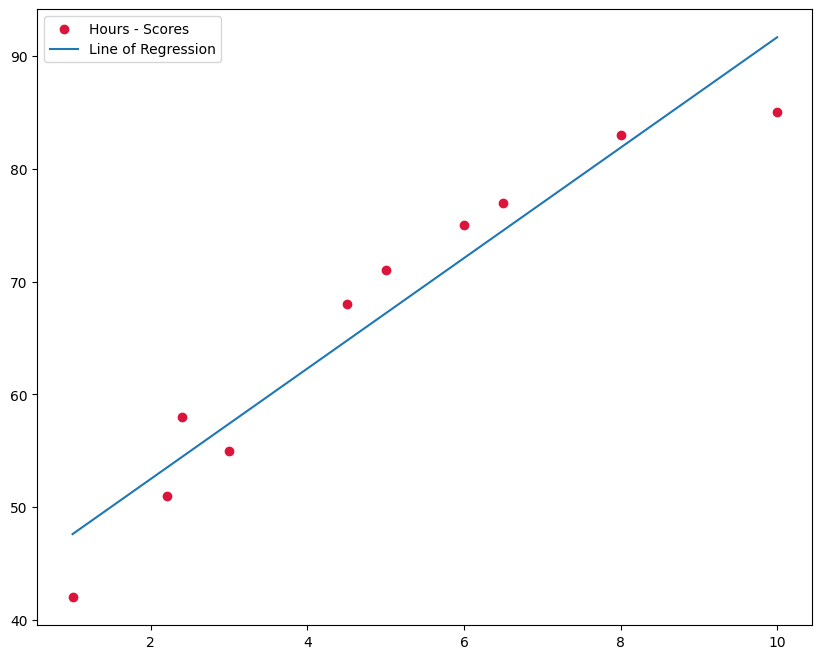

Evaluation Metrics: 
MSE: -2.1316282072803005e-15
R2 Score: 1.0


In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

file = open("student_scores.txt")

hours = []
scores = []

flag = 0

for line in file:
    for word in line.split():
        if flag:
            scores.append(word)
            flag = 0
        else:
            hours.append(word)
            flag = 1

file.close()

hours.pop(0)
scores.pop(0)

for i in range(len(hours)):
    hours[i] = float(hours[i])
    scores[i] = float(scores[i])

hours = np.array(hours)
scores = np.array(scores)

print(f"Hours Max: {np.max(hours)}")
print(f"Hours Min: {np.min(hours)}")
print(f"Hours Mean: {np.mean(hours)}")
print(f"Hours Median: {np.median(hours)}", end = "\n\n")

print(f"Scores Max: {np.max(scores)}")
print(f"Scores Min: {np.min(scores)}")
print(f"Scores Mean: {np.mean(scores)}")
print(f"Scores Median: {np.median(scores)}")

#   Slope
xmean = np.mean(hours)
ymean = np.mean(scores)

#   Numerator
numerator = 0
for i in range(len(hours)):
    numerator += (hours[i] - xmean)*(scores[i] - ymean)

#   Denominator
denominator = 0
for i in range(len(hours)):
    denominator += (hours[i] - xmean) **2

m = numerator / denominator

#   Intercept
b = ymean - xmean * m

predScores = []
for i in range(len(hours)):
    predScores.append(m * hours[i] + b)

plt.figure(figsize = (10, 8))
plt.scatter(hours, scores, color = 'crimson', label = 'Hours - Scores')
plt.plot(hours, predScores, label = 'Line of Regression')

plt.legend()
plt.show()

#   MSE
mse = 0
for i in range(len(hours)):
    mse += predScores[i] - scores[i]

#   R2 Score
r2 = 0
for i in range(len(hours)):
    r2 += (predScores[i] - ymean) ** 2

r2 /= (r2 + mse)

mse /= len(hours)


print("Evaluation Metrics: ")
print(f"MSE: {mse}")
print(f"R2 Score: {r2}")

In [72]:
import math
import random
import numpy as np

def f(x):
    return x * math.sin(10 * math.pi * x) + 1.0

POPULATION_SIZE = 10
GENERATIONS = 50
MUTATION_RATE = 0.1
MUTATION_NOISE_RANGE = 0.05

def initialize_population():
    return [random.uniform(0, 1) for _ in range(POPULATION_SIZE)]

def select_parent(population, fitness):
    total_fitness = sum(fitness)
    pick = random.uniform(0, total_fitness)
    current = 0
    for i, x in enumerate(population):
        current += fitness[i]
        if current > pick:
            return x
    return population[-1]

def crossover(parent1, parent2):
    return (parent1 + parent2) / 2

def mutate(x):
    if random.random() < MUTATION_RATE:
        noise = random.uniform(-MUTATION_NOISE_RANGE, MUTATION_NOISE_RANGE)
        return max(0, min(1, x + noise))
    return x

def genetic_algorithm():
    population = initialize_population()
    best_x = None
    best_fitness = -math.inf

    for generation in range(GENERATIONS):
        fitness = [f(x) for x in population]

        current_best = max(fitness)
        if current_best > best_fitness:
            best_fitness = current_best
            best_x = population[fitness.index(current_best)]

        parents = [select_parent(population, fitness) for _ in range(POPULATION_SIZE)]

        new_population = []
        for i in range(0, POPULATION_SIZE, 2):
            parent1, parent2 = parents[i], parents[i+1] if i+1 < POPULATION_SIZE else parents[i]
            child = crossover(parent1, parent2)
            new_population.extend([mutate(child), mutate(child)])

        population = new_population[:POPULATION_SIZE]

        print(f"Generation {generation + 1}: Best f(x) = {best_fitness:.4f} at x = {best_x:.4f}")

    return best_x, best_fitness

best_x, best_fitness = genetic_algorithm()
print(f"\nFinal Result: x = {best_x:.4f}, f(x) = {best_fitness:.4f}")

Generation 1: Best f(x) = 1.8385 at x = 0.8458
Generation 2: Best f(x) = 1.8385 at x = 0.8458
Generation 3: Best f(x) = 1.8385 at x = 0.8458
Generation 4: Best f(x) = 1.8385 at x = 0.8458
Generation 5: Best f(x) = 1.8385 at x = 0.8458
Generation 6: Best f(x) = 1.8385 at x = 0.8458
Generation 7: Best f(x) = 1.8385 at x = 0.8458
Generation 8: Best f(x) = 1.8385 at x = 0.8458
Generation 9: Best f(x) = 1.8385 at x = 0.8458
Generation 10: Best f(x) = 1.8385 at x = 0.8458
Generation 11: Best f(x) = 1.8385 at x = 0.8458
Generation 12: Best f(x) = 1.8385 at x = 0.8458
Generation 13: Best f(x) = 1.8385 at x = 0.8458
Generation 14: Best f(x) = 1.8385 at x = 0.8458
Generation 15: Best f(x) = 1.8385 at x = 0.8458
Generation 16: Best f(x) = 1.8385 at x = 0.8458
Generation 17: Best f(x) = 1.8385 at x = 0.8458
Generation 18: Best f(x) = 1.8385 at x = 0.8458
Generation 19: Best f(x) = 1.8385 at x = 0.8458
Generation 20: Best f(x) = 1.8385 at x = 0.8458
Generation 21: Best f(x) = 1.8385 at x = 0.8458
G

In [89]:
import numpy as np
from collections import deque

size = np.random.randint(10, 15)
print(f"Size: {size}x{size}")
myList = [[np.random.randint(0, 2) for i in range(size)] for i in range(size)]

start = (np.random.randint(0, size), np.random.randint(0, size))
goal = (np.random.randint(0, size), np.random.randint(0, size))

x, y = start
myList[x][y] = 'S'

x, y = goal
myList[x][y] = 'G'

myList = np.array(myList)

print(f"Start: {start}")
print(f"Goal: {goal}")

print(myList)

def getNeighbours(current):
    x, y = current
    neighbours = []
    for i, j in [(-1, 0), (1, 0), (0, -1), (0, 1)]:
        if 0 <= x + i < size and 0 <= y + j < size and myList[x + i][y + j] != 1:
            neighbours.append((x + i, y + j))
    return neighbours

def DFS(start, goal):
    stack = [(0, start, [start])]
    visited = set()
    nodes = 1

    while stack:
        cost, current, path = stack.pop()

        if current == goal:
            return cost, nodes, path

        if current not in visited:
            nodes += 1
            visited.add(current)

            for neighbour in getNeighbours(current):
                if neighbour not in visited:
                    newCost = cost + 1
                    stack.append((newCost, neighbour, path + [neighbour]))
    return None, None, None

def BFS(start, goal):
    queue = deque([(0, start, [start])])
    visited = set()
    nodes = 1

    while queue:
        cost, current, path = queue.popleft()

        if current == goal:
            return cost, nodes, path

        if current not in visited:
            nodes += 1
            visited.add(current)

            for neighbour in getNeighbours(current):
                if neighbour not in visited:
                    newCost = cost + 1
                    queue.append((newCost, neighbour, path + [neighbour]))
    return None, None, None

cost, nodes, path = DFS(start, goal)

print("DFS")
if path:
    print(f"Nodes Expanded: {nodes}\nCost: {cost}")
    print(path[0], end = "")
    for i in range(1, len(path)):
        print(f" --> {path[i]}", end = "")
else:
    print("No Path Found")


cost, nodes, path = BFS(start, goal)

print("\n\nBFS")
if path:
    print(f"Nodes Expanded: {nodes}\nCost: {cost}")
    print(path[0], end = "")
    for i in range(1, len(path)):
        print(f" --> {path[i]}", end = "")
else:
    print("No Path Found")

Size: 14x14
Start: (11, 5)
Goal: (12, 4)
[['1' '0' '1' '1' '0' '0' '1' '0' '1' '0' '1' '0' '0' '1']
 ['0' '1' '0' '1' '1' '0' '0' '1' '0' '0' '1' '0' '0' '1']
 ['1' '1' '1' '1' '1' '1' '0' '0' '0' '1' '1' '1' '0' '0']
 ['1' '0' '1' '1' '0' '0' '0' '0' '0' '0' '1' '0' '1' '0']
 ['0' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '0' '1']
 ['0' '1' '0' '0' '1' '1' '1' '0' '0' '1' '0' '0' '1' '1']
 ['1' '0' '0' '1' '0' '0' '1' '1' '1' '1' '0' '0' '0' '0']
 ['1' '1' '1' '0' '1' '0' '0' '0' '1' '0' '1' '0' '0' '1']
 ['1' '1' '1' '1' '0' '1' '1' '0' '0' '0' '0' '0' '0' '1']
 ['0' '0' '0' '0' '1' '0' '0' '0' '1' '1' '1' '0' '1' '1']
 ['0' '1' '0' '0' '0' '1' '1' '1' '0' '0' '0' '1' '1' '1']
 ['1' '1' '1' '1' '0' 'S' '1' '1' '0' '0' '1' '1' '1' '1']
 ['0' '0' '1' '0' 'G' '0' '1' '1' '1' '1' '0' '0' '1' '0']
 ['1' '1' '1' '1' '0' '1' '1' '1' '0' '1' '1' '1' '0' '1']]
DFS
Nodes Expanded: 19
Cost: 18
(11, 5) --> (11, 6) --> (11, 7) --> (11, 8) --> (11, 9) --> (11, 10) --> (11, 11) --> (11, 12) --> (